# Appendix - Nesterov Accelerated Gradient (NAG)



## Motivation and Key Idea

Nesterov Accelerated Gradient (NAG) is a variant of classical momentum designed to update parameters *more proactively*.
Instead of evaluating the gradient at the current position ($x_t$), NAG evaluates it at a **look-ahead point**:

$$
\tilde{x}_t = x_t - \beta v_t,
$$

where

* ($v_t$) = momentum velocity,
* ($\beta$) = momentum coefficient.

This look-ahead mechanism lets NAG correct the direction **before** applying the full momentum step.

The update rule becomes:

$$
\begin{aligned}
\tilde{x}_t &= x_t - \beta v_t, \\
v_{t+1} &= \beta v_t + \eta \nabla f(\tilde{x}*t), \\
x_{t+1} &= x_t - v_{t+1}.
\end{aligned}
$$

This differs from classical momentum which uses the gradient at ($x_t$).
The key difference is where the gradient is evaluated.

## Where the Formula Comes From

Start from classical momentum:

$$
v_{t+1} = \beta v_t + \eta \nabla f(x_t).
$$

Nesterov modifies it by computing the gradient at a future position:

$$
\nabla f(x_t) \quad\Longrightarrow\quad \nabla f(x_t - \beta v_t).
$$

$$
v_{t+1} = \beta v_t + \eta \nabla f(x_t - \beta v_t).
$$

Then update parameters using the new velocity:

$$
x_{t+1} = x_t - v_{t+1}.
$$

This is the full NAG update.

### Why this helps


To see why NAG behaves differently from classical momentum, we look at a first-order Taylor expansion of the gradient around ($x_t$):

$$
\nabla f(x_t - \beta v_t)
\approx
\nabla f(x_t) - \beta \nabla^2 f(x_t), v_t.
$$

This expression shows that evaluating the gradient at the look-ahead point introduces an additional term involving the Hessian ($\nabla^2 f(x_t)$), which measures the local curvature of the function.
In other words, NAG implicitly adjusts the update direction using curvature information **without explicitly computing the Hessian**.

This extra correction has two important effects:

1. **Faster response to curvature:**
   The term
   ($-\beta \nabla^2 f(x_t), v_t$)
   nudges the update in a direction that better aligns with the local geometry of the function.
   This often leads to faster convergence on smooth problems.

2. **Reduced overshooting:**
   Because the gradient is evaluated at a predicted future position, NAG “anticipates” how momentum will move the parameters.
   This look-ahead behavior helps it slow down earlier when approaching a minimum, producing fewer oscillations and more stable trajectories.

Together, these effects explain why NAG frequently converges faster and with less overshoot compared to classical momentum.

## Visualization on a Simple Quadratic

We compare:

* Classical Momentum
* NAG

on the 1D quadratic:
$$
f(x) = \frac{a}{2} x^2,\quad a = 5.
$$

Because the gradient is linear ($\nabla f(x) = ax$), this setting clearly shows the difference in convergence behavior.

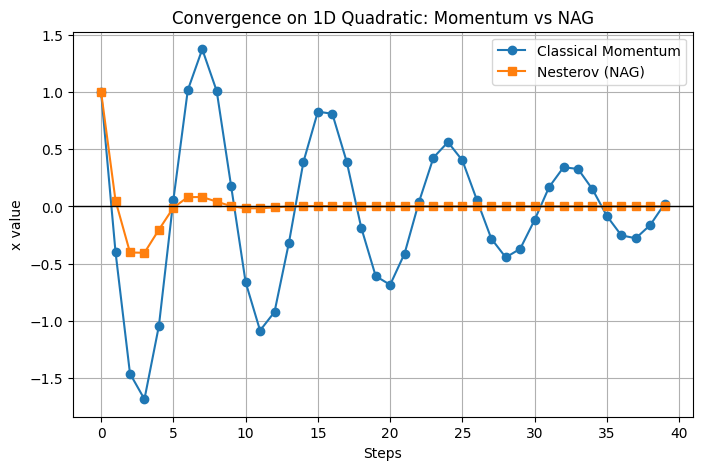

In [1]:
import torch
import matplotlib.pyplot as plt

# Quadratic function: f(x) = 1/2 * a * x^2
a = 5.0
def f_1d(x):
  return 0.5 * a * x**2
def gradient_1d(x):
  return a * x

eta = 0.1
beta = 0.9
steps = 40

# Classical Momentum
x_m = torch.tensor([2.0], requires_grad=False)
v_m = torch.zeros_like(x_m)
history_m = []

for t in range(steps):
    g = gradient_1d(x_m)
    v_m = beta * v_m + eta * g
    x_m = x_m - v_m
    history_m.append(x_m.item())

# Nesterov Accelerated Gradient (NAG)
x_n = torch.tensor([2.0], requires_grad=False)
v_n = torch.zeros_like(x_n)
history_n = []

for t in range(steps):
    # Look-ahead
    x_look = x_n - beta * v_n
    g = gradient_1d(x_look)
    v_n = beta * v_n + eta * g
    x_n = x_n - v_n
    history_n.append(x_n.item())

# Plot
plt.figure(figsize=(8,5))
plt.plot(history_m, 'o-', label='Classical Momentum')
plt.plot(history_n, 's-', label='Nesterov (NAG)')
plt.axhline(0, color='black', linewidth=1)
plt.title("Convergence on 1D Quadratic: Momentum vs NAG")
plt.xlabel("Steps")
plt.ylabel("x value")
plt.grid(True)
plt.legend()
plt.show()

We can see that Nesterov momentum converges faster than classical momentum on many smooth problems because it evaluates the gradient at a look-ahead position, producing a more accurate update direction. This reduces overshooting and improves stability, especially in regions with high curvature.